**CH3**

In [ ]:
import pandas as pd 
import requests, zipfile
from io import StringIO
import io

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url,stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
ls

sample_data/  student-mat.csv  student-merge.R  student-por.csv  student.txt


In [ ]:
student_data_math = pd.read_csv('student-mat.csv')

student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [ ]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
#讀取資料中的性別欄位
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [ ]:
#讀取資料中的缺席欄位
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [ ]:
#以性別為基準，計算年齡的平均值
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

(array([287.,  72.,  25.,   5.,   1.,   2.,   0.,   2.,   0.,   1.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <BarContainer object of 10 artists>)

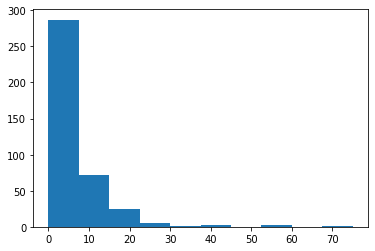

In [ ]:
# histogram、指定資料
plt.hist(student_data_math['absences'])

Text(0, 0.5, 'count')

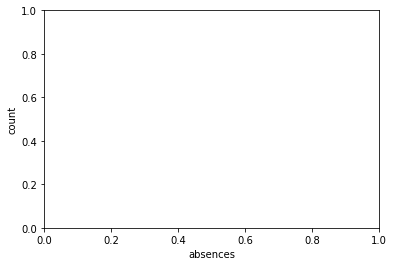

In [ ]:
# x軸與y軸的標籤
plt.xlabel('absences')
plt.ylabel('count')

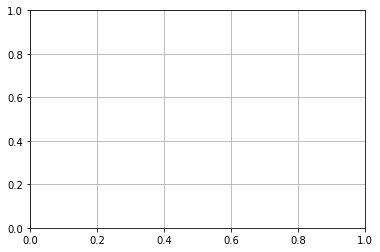

In [ ]:
# 加上格線
plt.grid(True)

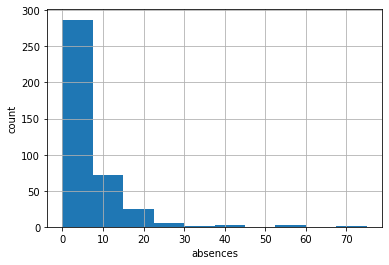

In [ ]:
# histogram、指定資料
plt.hist(student_data_math['absences'])

# x軸與y軸的標籤
plt.xlabel('absences')
plt.ylabel('count')

# 加上格線
plt.grid(True)

In [ ]:
# 平均値(mean)
print('平均値：', student_data_math['absences'].mean())
# 中位數(median)
print('中位數：', student_data_math['absences'].median())
# 眾數(mode)
print('眾數：', student_data_math['absences'].mode())

平均値： 5.708860759493671
中位數： 4.0
眾數： 0    0
dtype: int64


In [ ]:
# 變異數(var)
student_data_math['absences'].var()

64.04954057700957

In [ ]:
# 標準差 σ(std)
student_data_math['absences'].std()

8.00309568710818

In [ ]:
# 摘要統計量(describe)
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [ ]:
# 四分位距(第75百分位數 ー 第25百分位數)
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.0

In [ ]:
# 統整地計算摘要統計量
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


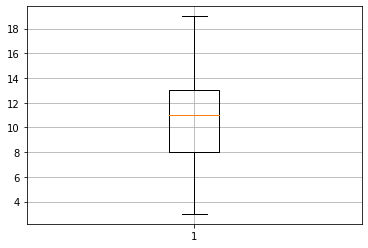

In [ ]:
# 箱型圖：G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

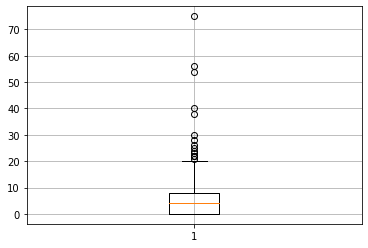

In [ ]:
# 箱型圖：缺席次數
plt.boxplot(student_data_math['absences'])
plt.grid(True)

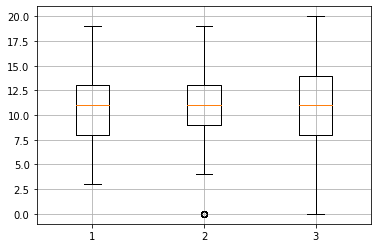

In [ ]:
# 箱型圖：G1,G2,G3
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

In [ ]:
# 變異係數：缺席次數
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.4018726369879073

In [ ]:
# 變異係數計算
student_data_math.std() / student_data_math.mean()

<ipython-input-31-9fea27996851>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  student_data_math.std() / student_data_math.mean()


age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

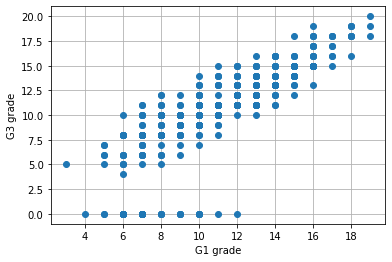

In [ ]:
# 散布圖
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

# 標籤
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [ ]:
import numpy as np
# 共變異矩陣
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.01705327, 12.18768232],
       [12.18768232, 20.9896164 ]])

In [ ]:
# 變異數
print('G1的變異數:',student_data_math['G1'].var())
print('G3的變異數:',student_data_math['G3'].var())

G1的變異數: 11.017053267364904
G3的變異數: 20.989616397866733


In [ ]:
from spotipy import Spotify as sp
sp = spotipy.Spotify()
#皮爾森相關係數(Pearson’s correlation coefficient)
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

ModuleNotFoundError: ignored

In [ ]:
# 相關矩陣
np.corrcoef([student_data_math['G1'], student_data_math['G3']]) 

array([[1.        , 0.80146793],
       [0.80146793, 1.        ]])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


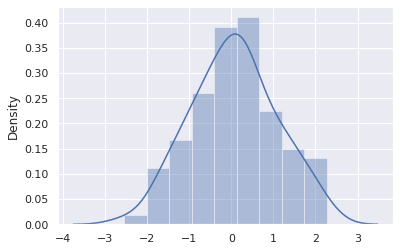

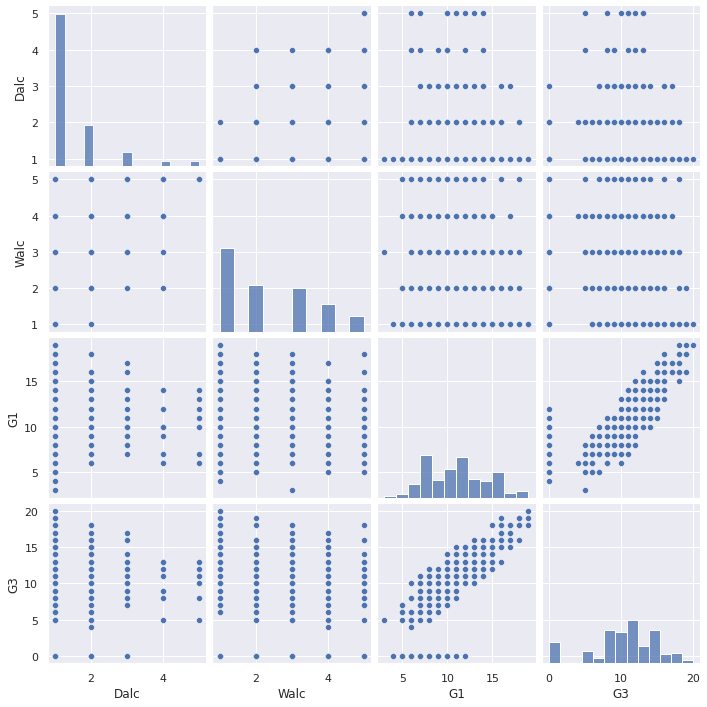

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

sns.set()
np.random.seed(0)
x = np.random.randn(100)

sns.distplot(x)

sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [ ]:
# 例：週末喝酒的人第一學期成績平均値
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

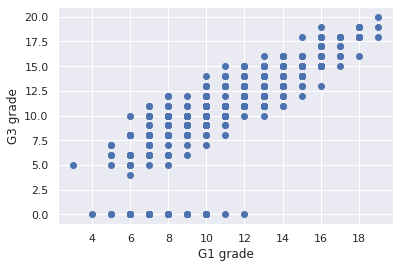

In [ ]:
# 散佈圖
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [ ]:
from sklearn import linear_model

# 生成線性迴歸的實例
reg = linear_model.LinearRegression()

In [ ]:
# 解釋變數使用第一學期的數學成績
# loc從DataFrame取出指定的列與行。loc[:, ['G1']]會取出G1行的所有列
# 留意使用values，取出值
X = student_data_math.loc[:,['G1']].values

# 目標變數使用最終的數學成績
Y = student_data_math['G3'].values

# 計算預測模型，求算出a,b
reg.fit(X, Y)

# 迴歸係數
print('迴歸係數:', reg.coef_)
# 截距
print('截距:', reg.intercept_)

迴歸係數: [1.10625609]
截距: -1.6528038288004634


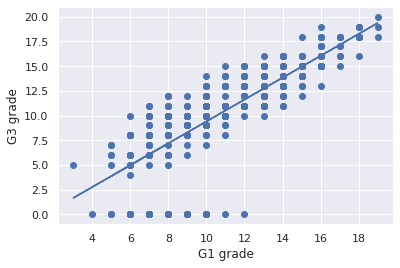

In [ ]:
# 與先前相同的散佈圖
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

# 描繪出線性迴歸直線
plt.plot(X, reg.predict(X))
plt.grid(True)

In [ ]:
# 決定係数也稱為貢獻度
print('決定係数:', reg.score(X,Y))

決定係数: 0.6423508460522701


**動動手** – 葡萄牙語

**機率與統計**

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 固定亂數種子
np.random.seed(0)

In [ ]:
# 儲存骰子可能的到的值
dice_data = np.array([1, 2, 3, 4, 5, 6])

In [ ]:
# 第2個指定參數指定「1」，便能隨機取出1個
print('隨機取出1個:', np.random.choice(dice_data, 1))

隨機取出1個: [5]


In [ ]:
# 丟擲1000次
calc_steps = 1000

# 從1〜6的資料中，進行1000次的取出
dice_rolls = np.random.choice(dice_data, calc_steps)

# 計算各個數字分別以多少的比例被取出
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, '出現的機率', p)

1 出現的機率 0.171
2 出現的機率 0.158
3 出現的機率 0.157
4 出現的機率 0.183
5 出現的機率 0.16
6 出現的機率 0.171


In [ ]:
coin_data = np.array([0,1])

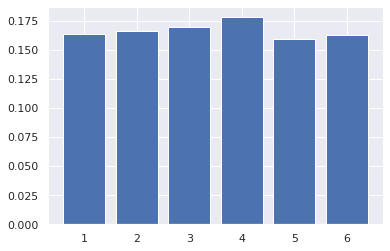

In [ ]:
# 均勻分布
# 擲骰子1000次
calc_steps = 1000

# 從1到6的資料當中，進行1000次的取出
dice_rolls = np.random.choice(dice_data, calc_steps)

# 計算每個數字分別以多少的比例被取出
prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)

In [ ]:
# Bernoulli distribution
# 0:head(正面)、1:tail(反面)
# 
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# 以unique取出唯一值（在此為0與1）
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, '出現的機率', p)
    prob_be_data = np.append(prob_be_data, p)

0 出現的機率 0.625
1 出現的機率 0.375


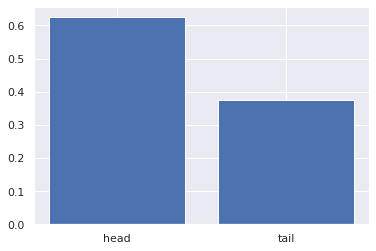

In [ ]:
plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

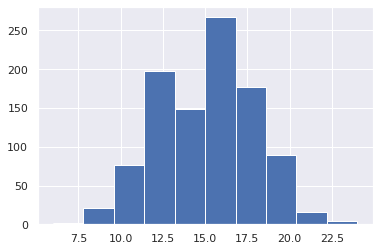

In [ ]:
# 二項分布
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

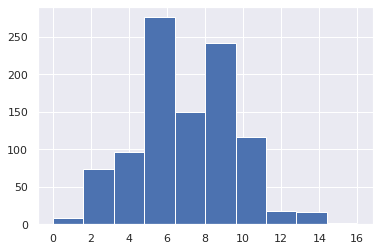

In [ ]:
# 卜瓦松分布(Poisson distribution)
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

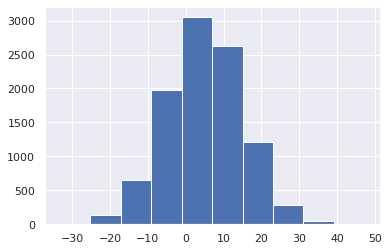

In [ ]:
# 常態分布
# np.random.normal(平均、標準差、樣本數)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

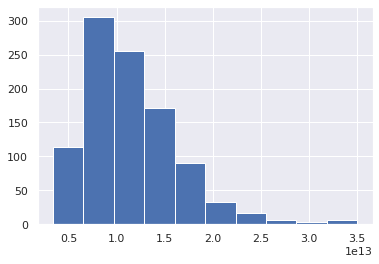

In [ ]:
# 對數常態分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

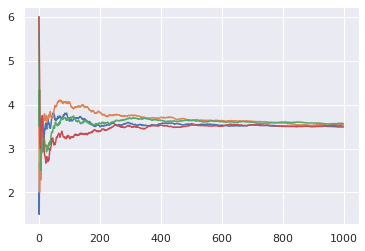

In [ ]:
# 大數法則
# 計算次數
calc_times =1000
# 骰子
sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)
# 產生四個回合
for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

In [ ]:
# 中央極限定理
def function_central_theory(N):
    
    sample_array = np.array([1, 2, 3, 4, 5, 6])
    numaber_cnt = np.arange(1, N + 1) * 1.0
 
    mean_array = np.array([])
 
    for i in range(1000):   
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)
 
    plt.hist(mean_array)
    plt.grid(True)

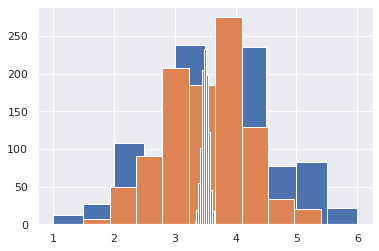

In [ ]:
# N=3
function_central_theory(3)

# N=6
function_central_theory(6)

# N= 10^3
function_central_theory(10**3)

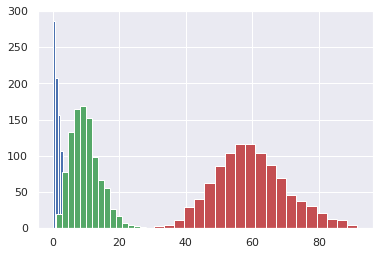

In [ ]:
# 卡方分布
# 自由度2, 10, 60卡方分布所生成亂數的直方圖
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

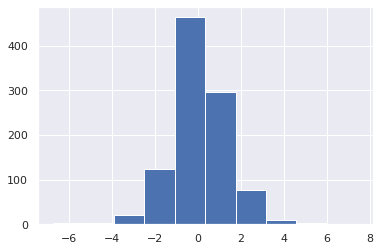

In [ ]:
# t分布
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

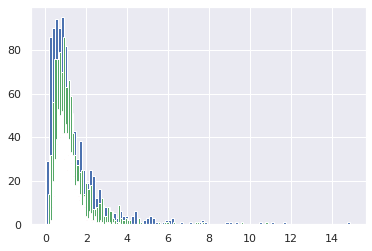

In [ ]:
# F分布
for df, c in zip([ (6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)

In [ ]:
# 概似函數（likelihood function）
def coin_likeh_fuc(x):
    return (x**3) * ((1-x)**2)

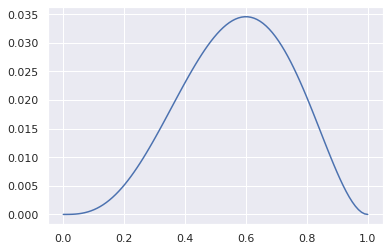

In [ ]:
x = np.linspace(0, 1, 100)
plt.plot(x,coin_likeh_fuc(x))
plt.grid(True)

In [ ]:
# 讀取數學的資料
student_data_math = pd.read_csv('student-mat.csv', sep=';')
# 讀取葡萄牙語的資料
student_data_por = pd.read_csv('student-por.csv', sep=';')
# 合併
student_data_merge = pd.merge(student_data_math
, student_data_por
, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu'
, 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
, suffixes=('_math', '_por'))

print('G1數學的成績平均：', student_data_merge.G1_math.mean())
print('G1葡萄牙語的成績平均：', student_data_merge.G1_por.mean())

G1數學的成績平均： 10.861256544502618
G1葡萄牙語的成績平均： 12.112565445026178


In [ ]:
#計算p-value
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print( 'p値 = ', p)

p値 =  1.653655521710079e-16


**CH4**

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp

# 視覺化函式庫
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# 顯示到小數點後第3位
%precision 3

'%.3f'

In [2]:
# 先準備資料
# 等距数字
sample_array = np.arange(10)
print('sample_array:',sample_array)

sample_array: [0 1 2 3 4 5 6 7 8 9]


In [3]:
# 原本的資料
print(sample_array)

# 取得前面的5個數字，帶入sample_array_slice變數中（切割）
sample_array_slice = sample_array[0:5]
print(sample_array_slice)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]


In [4]:
# 將sample_array_slice的前三個數值替換為10。
sample_array_slice[0:3] = 10
print(sample_array_slice)

# 請注意，切割的變動也會使得原始的串列元素跟著變動
print(sample_array)

[10 10 10  3  4]
[10 10 10  3  4  5  6  7  8  9]


In [5]:
# copy產生另外的object
sample_array_copy = np.copy(sample_array)
print(sample_array_copy)

sample_array_copy[0:3] = 20
print(sample_array_copy)

# 原本串列的元素不會被改變
print(sample_array)

[10 10 10  3  4  5  6  7  8  9]
[20 20 20  3  4  5  6  7  8  9]
[10 10 10  3  4  5  6  7  8  9]


In [6]:
# 資料的準備
sample_names = np.array(['a','b','c','d','a'])
random.seed(0)
data = random.randn(5,5)

print(sample_names)
print(data)

['a' 'b' 'c' 'd' 'a']
[[ 1.764  0.4    0.979  2.241  1.868]
 [-0.977  0.95  -0.151 -0.103  0.411]
 [ 0.144  1.454  0.761  0.122  0.444]
 [ 0.334  1.494 -0.205  0.313 -0.854]
 [-2.553  0.654  0.864 -0.742  2.27 ]]


In [8]:
sample_names == 'a'

data[sample_names == 'a']

array([[ 1.764,  0.4  ,  0.979,  2.241,  1.868],
       [-2.553,  0.654,  0.864, -0.742,  2.27 ]])

In [9]:
# 製作用來條件控制的布林陣列
cond_data = np.array([True,True,False,False,True])

# 製作x_array陣列
x_array= np.array([1,2,3,4,5])

# 製作y_array陣列
y_array= np.array([100,200,300,400,500])

# 進行條件控制
print(np.where(cond_data,x_array,y_array))

[  1   2 300 400   5]


In [10]:
cond_data = np.array([True,True,False,False,True])

# 顯示cond_data
print(cond_data)

# 刪除重複
print(np.unique(cond_data))

[ True  True False False  True]
[False  True]


In [11]:
# universal函式
sample_data = np.arange(10)
print('原本的資料：', sample_data)
print('所有元素的平方根：',np.sqrt(sample_data))
print('所有元素的自然指數函數：',np.exp(sample_data))

原本的資料： [0 1 2 3 4 5 6 7 8 9]
所有元素的平方根： [0.    1.    1.414 1.732 2.    2.236 2.449 2.646 2.828 3.   ]
所有元素的自然指數函數： [1.000e+00 2.718e+00 7.389e+00 2.009e+01 5.460e+01 1.484e+02 4.034e+02
 1.097e+03 2.981e+03 8.103e+03]


In [12]:
# 製作一個包含9個元素的陣列。再重塑為3×3矩陣
sample_multi_array_data1 = np.arange(9).reshape(3,3)

print(sample_multi_array_data1)

print('最小値:',sample_multi_array_data1.min())
print('最大値:',sample_multi_array_data1.max())
print('平均:',sample_multi_array_data1.mean())
print('總和:',sample_multi_array_data1.sum())

# 指定列與行來求得總和
print('列的總和:',sample_multi_array_data1.sum(axis=1))
print('行的總和:',sample_multi_array_data1.sum(axis=0))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
最小値: 0
最大値: 8
平均: 4.0
總和: 36
列的總和: [ 3 12 21]
行的總和: [ 9 12 15]


In [13]:
# 真偽値陣列函式
cond_data = np.array([True,True,False,False,True])

print('是否至少有一個True:',cond_data.any())
print('是否全部為True:',cond_data.all())

是否至少有一個True: True
是否全部為True: False


In [14]:
sample_multi_array_data1 = np.arange(9).reshape(3,3)
print(sample_multi_array_data1)
print('比5大的數字有幾個:',(sample_multi_array_data1>5).sum())

[[0 1 2]
 [3 4 5]
 [6 7 8]]
比5大的數字有幾個: 3


In [15]:
# 矩陣計算
sample_multi_array_data1 = np.arange(9).reshape(3,3)
print(sample_multi_array_data1)

print('對角元素:',np.diag(sample_multi_array_data1))
print('對角元素之和:',np.trace(sample_multi_array_data1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
對角元素: [0 4 8]
對角元素之和: 12


In [16]:
# 資料的準備
sample_array = np.arange(10)
sample_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
# 轉變形狀(維度)
sample_array2 = sample_array.reshape(2,5)
sample_array2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [21]:
sample_array2.reshape(5,2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [22]:
# 資料的準備
sample_array3 = np.array([[1,2,3],[4,5,6]])
sample_array4 = np.array([[7,8,9],[10,11,12]])
print(sample_array3)
print(sample_array4)

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]


第0軸 增加資料量

In [36]:
# 列方向的結合(axis=0)
np.concatenate([sample_array3,sample_array4],axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [37]:
np.vstack((sample_array3,sample_array4))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

第1軸 增加欄的數量

In [24]:
# 行方向的結合(axis=1)
np.concatenate([sample_array3,sample_array4],axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [38]:
np.hstack((sample_array3,sample_array4))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

**動動手**  下方兩個陣列，請試試在列方向及行方向結合

In [25]:
sample_array1 = np.arange(12).reshape(3,4)
sample_array2 = np.arange(12).reshape(3,4)

In [29]:
# 列方向的結合，以參數axis=0來指定
np.vstack((sample_array1,sample_array2))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
# 行方向的結合(axis=1)
np.hstack((sample_array1,sample_array2))

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

**動動手** 請對下方串列中的每個元素加上3

In [31]:
sample_list = [1,2,3,4,5]

In [33]:
# 將list轉成ndarray,利用ndarray的elementwise computation計算
# 再轉回list
sample=np.array(sample_list)
print(sample+3)
print(list(sample+3))

[4 5 6 7 8]
[4, 5, 6, 7, 8]


In [34]:
#利用list生程式
[i+3 for i in sample_list]

[4, 5, 6, 7, 8]

In [35]:
#利用for迴圈
result=[]
for i in sample_list:
  result.append(i+3)

print(result)

[4, 5, 6, 7, 8]


線性內插

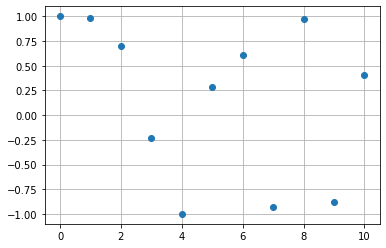

In [39]:
# 使用linspace來生成開始為0、結束為10的11等差數列，做為x
x = np.linspace(0, 10, num=11, endpoint=True)

# 生成y的值
y = np.cos(-x**2/5.0)
plt.plot(x,y,'o')
plt.grid(True)

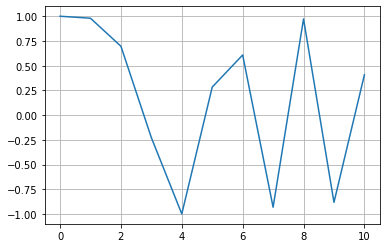

In [40]:
from scipy import interpolate

# 線性內插。在interp1d的參數指定「linear」
f = interpolate.interp1d(x, y,'linear')
plt.plot(x,f(x),'-')
plt.grid(True)

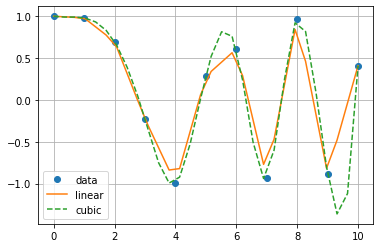

In [41]:
f2 = interpolate.interp1d(x, y,'cubic')

#為了顯示出曲線，將x值細切
xnew = np.linspace(0, 10, num=30, endpoint=True)

# 圖形化，將f以實線描繪、f2以虛線描繪
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')

# 圖例
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.grid(True)

**動動手** 進行線性內插的計算，並描繪圖形

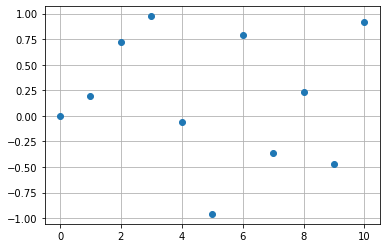

In [42]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.sin(x**2/5.0)
plt.plot(x,y,'o')
plt.grid(True)

**線性代數：矩陣分解**

In [43]:
# (2,5)矩陣
A = np.array([[1,2,3,4,5],[6,7,8,9,10]])

# 奇異値分解的函式linalg.svd
U, s, Vs = sp.linalg.svd(A)
m, n = A.shape

S = sp.linalg.diagsvd(s,m,n)

print('U.S.V* = \n',U@S@Vs)

U.S.V* = 
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]


In [44]:
# 資料的準備
A = np.identity(5)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 5
b = np.ones(5)

# 對正方矩陣進行LU分解
(LU,piv) = sp.linalg.lu_factor(A)

L = np.identity(5) + np.tril(LU,-1)
U = np.triu(LU)
P = np.identity(5)[piv]

# 求解
x = sp.linalg.lu_solve((LU,piv),b)
x

array([-3.,  4.,  4.,  4.,  4.])

In [45]:
B = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
B

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [46]:
A = np.identity(3)
print(A)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 3
b = np.ones(3)
print(A)
print(b)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[3. 1. 1.]
 [1. 1. 0.]
 [1. 0. 1.]]
[1. 1. 1.]


In [47]:
# 積分計算
from scipy import integrate
import math

def calcPi(x):
    return 4/(1+x**2)

# 計算結果與估計誤差
integrate.quad(calcPi, 0, 1)

(3.142, 0.000)

In [48]:
from numpy import sin
integrate.quad(sin, 0, math.pi/1)

# 2重積分
def I(n):
    return integrate.dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x: 1, lambda x: np.inf)

print('n=1時:',I(1))
print('n=2時:',I(2))
print('n=3時:',I(3))
print('n=4時:',I(4))

n=1時: (1.0000000000048965, 6.360750360104306e-08)
n=2時: (0.4999999999985751, 1.3894083651858995e-08)
n=3時: (0.33333333325010883, 1.3888461883425516e-08)
n=4時: (0.2500000000043577, 1.2983033469368098e-08)


**二次函數的最佳化**

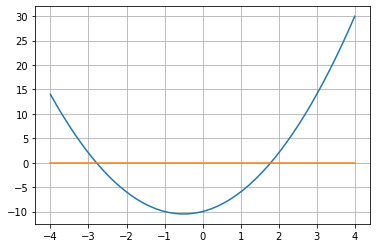

In [49]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    y = 2 * x**2 + 2 * x - 10
    return y
# 試著圖形化
x = np.linspace(-4,4)
plt.plot(x,f(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)